#                                         TITANIC PROBLEM KAGGLE

### This is a Classifier Supervised Machine Learning Project in which we have to successfully identify whether a person survived the Titanic Ship tragedy or not, given features about them such as their name, age, sex, ticket fare, cabin, etc.

#                                         TITANIC PROBLEM KAGGLE

### This is a Classifier Supervised Machine Learning Project in which we have to successfully identify whether a person survived the Titanic Ship tragedy or not, given features about them such as their name, age, sex, ticket fare, cabin, etc.

In [1]:
#Importing Basic ML Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Now we load our training and test datasets in order to visualise and know our features better.
train = pd.read_csv(r"C:\Users\hp\Desktop\New folder\projects\titanic problem\train.csv")
test = pd.read_csv(r"C:\Users\hp\Desktop\New folder\projects\titanic problem\test.csv")


In [2]:
#We visualise our data.
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### In our data we have 11 different features and we have to classify whether a person survived or not based on these.

### Now first of all we have to do Data Cleaning and Data Preprocessing. It considers the following:
### i) Dealing with missing values or NAN values.
### ii) converting textual data into a format that can be deployed in our model.
### iii) Handling Categorical data.

### Before we do that we need to combine the Test and Training Datasets so that we can apply all the changes to them simultanously and won't have to do it twice.

In [4]:
#clubbing the test and training data
df = pd.concat((train, test), axis = 0)

In [5]:
#NAN Values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### So 4 features contain NAN values with them.
### lis = ('Age', 'Fare, 'Cabin', 'Embarked')
### Now we visualise with a heat map too.

<AxesSubplot:>

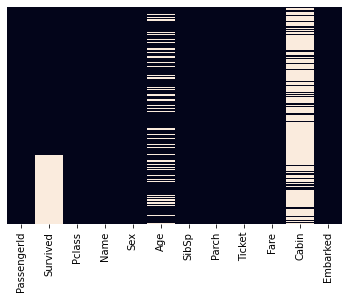

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [7]:
# Replacing NAN values with either mean values or mode values. 
# Also Feature 'Cabin' has only 295 non null values out of 1309, so we basically drop the whole column for now.
df = df.drop(['Cabin'], axis = 1)
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


<AxesSubplot:>

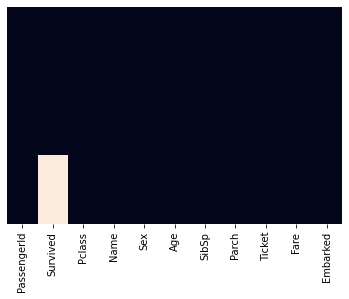

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

### So There is no NAN values left.

### Now we need to take care of the categorical data.
### col = (Pclass, Sex, SibSp, Parch, Embarked) are the features which contain categorical data.
### Note that there are two kind of Categorical Data: Nominal and Ordinal data. All these column are Nominal Categorical Data.
### We deal with Nominal Data By creating Dummmy variables which are binary columns basically.

In [9]:
#Nominal Categorical Data
col = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
def one_hot_encod(col, df):
    j = 0
    df_final = df
    for i in col:
        df1 = pd.get_dummies(df[i], drop_first = True)
        df.drop([i], axis = 1, inplace= True)
        
        if j == 0:
            df_final = df1
        else:
            df_final = pd.concat((df_final, df1), axis = 1)
        j += 1
    df_final = pd.concat((df_final, df), axis = 1)
    return df_final
final_df = one_hot_encod(col, df)    
    

In [10]:
final_df

,2,3,male,1,2,3,4,5,8,1,...,6,9,Q,S,PassengerId,Survived,Name,Age,Ticket,Fare
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0.0,"Braund, Mr. Owen Harris",22.000000,A/5 21171,7.2500
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,PC 17599,71.2833
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,3,1.0,"Heikkinen, Miss. Laina",26.000000,STON/O2. 3101282,7.9250
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,113803,53.1000
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,5,0.0,"Allen, Mr. William Henry",35.000000,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1305,NaN,"Spector, Mr. Woolf",29.881138,A.5. 3236,8.0500
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1306,NaN,"Oliva y Ocana, Dona. Fermina",39.000000,PC 17758,108.9000
415,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1307,NaN,"Saether, Mr. Simon Sivertsen",38.500000,SOTON/O.Q. 3101262,7.2500
416,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1308,NaN,"Ware, Mr. Frederick",29.881138,359309,8.0500


### Note that while creating dummy variables and using get_dummies method, we use a parameter drop_first = True. What it does is that it creates k-1 dummies for K categories. For eg: for Sex, we had two categories male and female. so it removed female dummy column and wherever it is 0 for male, it is automatically assumed it is female.

### Now we deal with textual and mix data.
### In this problem only Name and Ticket columns are of textual type left. Rest all columns are dealt with.

In [11]:
df["Ticket"].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

### So we see that there is no specific order within the Ticket column. So we discard it for now for our initial iteration. Also Name column should also be droped for our initial iteration. 

In [12]:
final_df = final_df.drop(["Name"], axis = 1)
final_df = final_df.drop(["Ticket"], axis = 1)
final_df

,2,3,male,1,2,3,4,5,8,1,...,4,5,6,9,Q,S,PassengerId,Survived,Age,Fare
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0.0,22.000000,7.2500
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1.0,38.000000,71.2833
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,1.0,26.000000,7.9250
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,4,1.0,35.000000,53.1000
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,5,0.0,35.000000,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1305,NaN,29.881138,8.0500
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1306,NaN,39.000000,108.9000
415,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1307,NaN,38.500000,7.2500
416,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1308,NaN,29.881138,8.0500


In [13]:
# Now we split our training and test datasets as we have done basic Data Cleaning to be used in our model.

clean_train = final_df.iloc[:len(train)]
clean_test = final_df.iloc[len(train):]